<a href="https://colab.research.google.com/github/mofanchang/ptt-Word-Embedding-sentiment-analysis/blob/main/%E6%96%87%E5%AD%97%E9%9B%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#導包
import numpy as np
import pandas as pd
import sys
from gensim.models import word2vec
import os
import gensim
from gensim.models.word2vec import LineSentence

In [ ]:
jieba.load_userdict('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt')

s = open('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.txt','rb').read()

NameError: ignored

In [ ]:
#讀數據
data = open('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.txt','rb').read()

In [ ]:
import pandas as pd

# Read the text file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.txt', sep='\t', header=None)

# Write the dataframe to a CSV file
data=df.to_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.csv', index=False)
data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.csv')
data

,0
0,文章名稱
1,標題: [情報] 12/11「花蓮」捐血送全聯禮券400+春聯
2,標題: Re: [情報] iHerb 年底清倉低至4折！
3,標題: [情報] 雷亞 Cytus II 手機音樂遊戲 限免
4,標題: [情報] Line Point 15
...,...
1913,標題: [情報] 10/30台北捐血送【電影票】或【禮券】
1914,標題: [情報] 10/9邀請好友拿LINE POINTS 300點
1915,標題: [情報] 無線藍芽耳機JLAB GO AIR POP TONES $870
1916,標題: [情報] 買3M無痕 送吹風機活動


In [ ]:
data.rename(columns={'文章名稱': 'x'}, inplace=True)

In [ ]:
print(data)

NameError: ignored

In [ ]:

import jieba
jieba.load_userdict('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt')
stop = [line.strip() for line in open('/content/drive/MyDrive/Colab Notebooks/wordcloud/delete_words.txt').readlines()]

In [ ]:
#去停用詞
out = ''
for index in range(len(data)):
    ct = jieba.cut(data.loc[index,'0'])
    out = ''
    for word in ct:
        if word not in stop:
            out += word
            out += " "
    data.loc[index,'split'] = out

In [ ]:
data

,0,split
0,文章名稱,
1,標題: [情報] 12/11「花蓮」捐血送全聯禮券400+春聯,情報 ] 「 花蓮 」 捐血 全聯禮券 400 春聯
2,標題: Re: [情報] iHerb 年底清倉低至4折！,情報 ] iHerb 年底 清倉 至 ！
3,標題: [情報] 雷亞 Cytus II 手機音樂遊戲 限免,情報 ] 雷亞 Cytus 手機 音樂遊戲 限免
4,標題: [情報] Line Point 15,情報 ] Line Point
...,...,...
1913,標題: [情報] 10/30台北捐血送【電影票】或【禮券】,情報 ] 台北 捐血 電影票 或 禮券
1914,標題: [情報] 10/9邀請好友拿LINE POINTS 300點,情報 ] 邀請 好友 拿 LINE POINTS 300
1915,標題: [情報] 無線藍芽耳機JLAB GO AIR POP TONES $870,情報 ] 無線 藍芽 耳機 JLAB GO AIR POP TONE...
1916,標題: [情報] 買3M無痕 送吹風機活動,情報 ] 3M 無痕 吹 風機 活動


In [ ]:
df = data.iloc[:100,:1]
df.to_csv("first_100_rows.csv",index=False)
df

""
0
1
2
3
4
...
95
96
97
98


In [ ]:
import pprint
text = data['split']
sentences = []
for item in text:
    sentence = str(item).split(' ')
    sentences.append(sentence)

In [ ]:
#訓練
model = word2vec.Word2Vec(sentences,size = 50)
model.save('jk.model')

In [ ]:
def buildWordVector(imdb_w2v,text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    #print text
    for word in text.split():
        #print word
        try:
            vec += imdb_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            print (word)
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
result = buildWordVector(model, data.loc[1]['split'] , 50)
for i in range(1,len(data)):
    result = np.concatenate((result, buildWordVector(model, data.loc[i]['split'] , 50)), axis = 0)

<ipython-input-66-0eff7c4131be>:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vec += imdb_w2v[word].reshape((1, size))


串流輸出內容已截斷至最後 5000 行。
美金
德國
頂級
魚油
入組
14999
雞塊
大薯
薯餅
通通
麥當
勞連
五感
謝祭
代幣
等你拿
拍雙
超
贈點
ASICS
GEL
EXCITE
淘寶雙
總
SAMSUNG
連網
15900
慶生
組合價
1888
SanDisk
Extreme
紅金卡
256G
邁紀
錄器
漫步者
完整
觀劇
悠活
原力
維生
D
錠
G
PLUS
頸掛
電暖
懷爐
GP
WH001N
內湖
誠鮮
吃
飽
日到
GOOGLE
安裝
節感
謝有
你
互贈
多
那
之
WEMO
年度
回顧
人人
有獎
蘭蔻
小黑
2620
sidenotes
let
'
s
cafe
接近
文旦
一顆
週三
非
店家
能
收納
組共
個掛
鉤
bookwalker
購書
三商
拿坡
里
Switch
紅藍主機
6990
MIZUNO
WAVE
遠雄
海洋
公園
點折
全聯北市
中正
延平
鹽地
番茄
49
飛夢妮
12.12
券有
全台
CUP
GO
來速
站點
大杯
第
15%
超市
HP
15s
eq2173AU
極地白
智米
AP
2999
中嘉
寬頻
升速
案
今日
熱
百靈油
100ml
1380
超值
兑
龍泰起
司條
5.75
A5
骰子
朱記
清燉
牛肉
資生堂
遠傳倍
潔雅衛
x56
589
Persil
寶瀅
三合一
膠囊
DHC
純欖護
脣膏
全自動
NC
A701
巴哈姆
特
戰神
同
梱
19380
大量
到貨
中嘉固網
friday
現省
1194
AROMASE
艾瑪絲
草本
去屑
90mL
蘭芝
11.11
全聯阪
急
掃地機
9999
全聯益
力壯
清力
穩力
一送
一
2002R
3199
％
完成
測驗
領取
Vana
Candles
全品
項
九折
happygo
國內
調漲
黛安芬
拿坡里
品川
蘭
年末
牌空氣
歡度
平安夜
自來
水園區
明免
費入園
Ubereat
新用戶
折代碼
櫻桃
小丸子
桌
Well
Q7
8748
樂歌
支架
＋
15%
pCloud
抽紅包
人人
有獎
SAMSUNG
T7
移動
固態
KUDI
廚餘機
幣加碼
送補
蚊燈
漢堡
取貨送
77
另
隨取
卡將
上市
當日
170
鯊
不用
萬元
FILA
小白鞋
SONY
WH
1000XM5
耳罩
8289
金車
皇室
羽毛

In [ ]:
result

array([[ 0.26631052, -0.00955069, -0.12644717, ..., -0.03753362,
        -0.34118214,  0.32736161],
       [ 0.26631052, -0.00955069, -0.12644717, ..., -0.03753362,
        -0.34118214,  0.32736161],
       [ 0.24631139, -0.00161106, -0.11670409, ..., -0.04284863,
        -0.31069709,  0.29879854],
       ...,
       [ 0.2233573 ,  0.00411177, -0.11539422, ..., -0.04913438,
        -0.29119206,  0.2742207 ],
       [ 0.22927218, -0.00270029, -0.11160932, ..., -0.04321895,
        -0.29391141,  0.2828867 ],
       [ 0.23705467, -0.00797863, -0.11455585, ..., -0.03450839,
        -0.30485276,  0.28952305]])

In [ ]:
vectors = pd.DataFrame(result, columns = ["x1","x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10","x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30", "x31", "x32", "x33", "x34", "x35", "x36", "x37", "x38" ,"x39", "x40", "x41", "x42", "x43" ,"x44", "x45", "x46" ,"x47", "x48", "x49", "x50"])
vectors

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,0.266311,-0.009551,-0.126447,0.102996,-0.027382,-0.398548,0.279146,0.083948,-0.197018,-0.114155,...,0.005425,-0.110818,-0.374915,-0.071245,0.012925,0.193258,0.181136,-0.037534,-0.341182,0.327362
1,0.266311,-0.009551,-0.126447,0.102996,-0.027382,-0.398548,0.279146,0.083948,-0.197018,-0.114155,...,0.005425,-0.110818,-0.374915,-0.071245,0.012925,0.193258,0.181136,-0.037534,-0.341182,0.327362
2,0.246311,-0.001611,-0.116704,0.102953,-0.023877,-0.360630,0.251505,0.082001,-0.173610,-0.098931,...,0.006628,-0.097464,-0.345546,-0.063289,0.016212,0.177800,0.150792,-0.042849,-0.310697,0.298799
3,0.252757,0.004202,-0.128896,0.136569,-0.031101,-0.380161,0.243351,0.095632,-0.165069,-0.087482,...,0.022392,-0.090567,-0.357302,-0.066086,0.034781,0.188478,0.125318,-0.063221,-0.328312,0.303691
4,0.252274,0.000765,-0.129856,0.126451,-0.029615,-0.374991,0.246792,0.091668,-0.164136,-0.091557,...,0.013936,-0.089655,-0.358279,-0.062462,0.028341,0.186485,0.135167,-0.056317,-0.325225,0.309609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,0.258313,-0.009730,-0.118257,0.101505,-0.027558,-0.383940,0.267824,0.085724,-0.185819,-0.103143,...,0.003541,-0.107040,-0.364997,-0.069663,0.010945,0.188326,0.168241,-0.038590,-0.333967,0.317579
1914,0.255691,-0.006679,-0.122739,0.105460,-0.026050,-0.377486,0.265474,0.083077,-0.179800,-0.100920,...,0.006199,-0.104025,-0.360698,-0.069986,0.015582,0.185062,0.164466,-0.039053,-0.326133,0.314581
1915,0.223357,0.004112,-0.115394,0.110634,-0.024327,-0.338422,0.222412,0.082651,-0.150257,-0.083801,...,0.014482,-0.082773,-0.319262,-0.060043,0.024808,0.165388,0.119079,-0.049134,-0.291192,0.274221
1916,0.229272,-0.002700,-0.111609,0.096144,-0.030257,-0.341757,0.238602,0.078265,-0.160219,-0.087581,...,0.009513,-0.093527,-0.325145,-0.060616,0.017635,0.169781,0.137225,-0.043219,-0.293911,0.282887


In [ ]:
#合併dataframe
data = pd.concat([data, vectors], axis = 1)
data

,0,split,x1,x2,x3,x4,x5,x6,x7,x8,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,文章名稱,,0.266311,-0.009551,-0.126447,0.102996,-0.027382,-0.398548,0.279146,0.083948,...,0.005425,-0.110818,-0.374915,-0.071245,0.012925,0.193258,0.181136,-0.037534,-0.341182,0.327362
1,標題: [情報] 12/11「花蓮」捐血送全聯禮券400+春聯,情報 ] 「 花蓮 」 捐血 全聯禮券 400 春聯,0.266311,-0.009551,-0.126447,0.102996,-0.027382,-0.398548,0.279146,0.083948,...,0.005425,-0.110818,-0.374915,-0.071245,0.012925,0.193258,0.181136,-0.037534,-0.341182,0.327362
2,標題: Re: [情報] iHerb 年底清倉低至4折！,情報 ] iHerb 年底 清倉 至 ！,0.246311,-0.001611,-0.116704,0.102953,-0.023877,-0.360630,0.251505,0.082001,...,0.006628,-0.097464,-0.345546,-0.063289,0.016212,0.177800,0.150792,-0.042849,-0.310697,0.298799
3,標題: [情報] 雷亞 Cytus II 手機音樂遊戲 限免,情報 ] 雷亞 Cytus 手機 音樂遊戲 限免,0.252757,0.004202,-0.128896,0.136569,-0.031101,-0.380161,0.243351,0.095632,...,0.022392,-0.090567,-0.357302,-0.066086,0.034781,0.188478,0.125318,-0.063221,-0.328312,0.303691
4,標題: [情報] Line Point 15,情報 ] Line Point,0.252274,0.000765,-0.129856,0.126451,-0.029615,-0.374991,0.246792,0.091668,...,0.013936,-0.089655,-0.358279,-0.062462,0.028341,0.186485,0.135167,-0.056317,-0.325225,0.309609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,標題: [情報] 10/30台北捐血送【電影票】或【禮券】,情報 ] 台北 捐血 電影票 或 禮券,0.258313,-0.009730,-0.118257,0.101505,-0.027558,-0.383940,0.267824,0.085724,...,0.003541,-0.107040,-0.364997,-0.069663,0.010945,0.188326,0.168241,-0.038590,-0.333967,0.317579
1914,標題: [情報] 10/9邀請好友拿LINE POINTS 300點,情報 ] 邀請 好友 拿 LINE POINTS 300,0.255691,-0.006679,-0.122739,0.105460,-0.026050,-0.377486,0.265474,0.083077,...,0.006199,-0.104025,-0.360698,-0.069986,0.015582,0.185062,0.164466,-0.039053,-0.326133,0.314581
1915,標題: [情報] 無線藍芽耳機JLAB GO AIR POP TONES $870,情報 ] 無線 藍芽 耳機 JLAB GO AIR POP TONE...,0.223357,0.004112,-0.115394,0.110634,-0.024327,-0.338422,0.222412,0.082651,...,0.014482,-0.082773,-0.319262,-0.060043,0.024808,0.165388,0.119079,-0.049134,-0.291192,0.274221
1916,標題: [情報] 買3M無痕 送吹風機活動,情報 ] 3M 無痕 吹 風機 活動,0.229272,-0.002700,-0.111609,0.096144,-0.030257,-0.341757,0.238602,0.078265,...,0.009513,-0.093527,-0.325145,-0.060616,0.017635,0.169781,0.137225,-0.043219,-0.293911,0.282887


In [ ]:
#把series 轉換成dataframe格式，並且將五十維的特徵都賦值
vectors = pd.DataFrame(result, columns = ["x1","x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10","x11", "x12", "x13", "x14", "x15", "x16", "x17", "x18", "x19", "x20", "x21", "x22", "x23", "x24", "x25", "x26", "x27", "x28", "x29", "x30", "x31", "x32", "x33", "x34", "x35", "x36", "x37", "x38" ,"x39", "x40", "x41", "x42", "x43" ,"x44", "x45", "x46" ,"x47", "x48", "x49", "x50"])
vectors

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50
0,0.266311,-0.009551,-0.126447,0.102996,-0.027382,-0.398548,0.279146,0.083948,-0.197018,-0.114155,...,0.005425,-0.110818,-0.374915,-0.071245,0.012925,0.193258,0.181136,-0.037534,-0.341182,0.327362
1,0.266311,-0.009551,-0.126447,0.102996,-0.027382,-0.398548,0.279146,0.083948,-0.197018,-0.114155,...,0.005425,-0.110818,-0.374915,-0.071245,0.012925,0.193258,0.181136,-0.037534,-0.341182,0.327362
2,0.246311,-0.001611,-0.116704,0.102953,-0.023877,-0.360630,0.251505,0.082001,-0.173610,-0.098931,...,0.006628,-0.097464,-0.345546,-0.063289,0.016212,0.177800,0.150792,-0.042849,-0.310697,0.298799
3,0.252757,0.004202,-0.128896,0.136569,-0.031101,-0.380161,0.243351,0.095632,-0.165069,-0.087482,...,0.022392,-0.090567,-0.357302,-0.066086,0.034781,0.188478,0.125318,-0.063221,-0.328312,0.303691
4,0.252274,0.000765,-0.129856,0.126451,-0.029615,-0.374991,0.246792,0.091668,-0.164136,-0.091557,...,0.013936,-0.089655,-0.358279,-0.062462,0.028341,0.186485,0.135167,-0.056317,-0.325225,0.309609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1913,0.258313,-0.009730,-0.118257,0.101505,-0.027558,-0.383940,0.267824,0.085724,-0.185819,-0.103143,...,0.003541,-0.107040,-0.364997,-0.069663,0.010945,0.188326,0.168241,-0.038590,-0.333967,0.317579
1914,0.255691,-0.006679,-0.122739,0.105460,-0.026050,-0.377486,0.265474,0.083077,-0.179800,-0.100920,...,0.006199,-0.104025,-0.360698,-0.069986,0.015582,0.185062,0.164466,-0.039053,-0.326133,0.314581
1915,0.223357,0.004112,-0.115394,0.110634,-0.024327,-0.338422,0.222412,0.082651,-0.150257,-0.083801,...,0.014482,-0.082773,-0.319262,-0.060043,0.024808,0.165388,0.119079,-0.049134,-0.291192,0.274221
1916,0.229272,-0.002700,-0.111609,0.096144,-0.030257,-0.341757,0.238602,0.078265,-0.160219,-0.087581,...,0.009513,-0.093527,-0.325145,-0.060616,0.017635,0.169781,0.137225,-0.043219,-0.293911,0.282887


In [ ]:
df=vectors.to_csv('/content/drive/MyDrive/Colab Notebooks/wordcloud/vectors.csv')

In [ ]:
df1 = vectors.iloc[:, 1]
df1

0       0.321583
1       0.321583
2       0.287698
3       0.242495
4       0.278820
          ...   
1913    0.304649
1914    0.296656
1915    0.272245
1916    0.279778
1917    0.267286
Name: x2, Length: 1918, dtype: float64

In [ ]:
df1.to_csv('df1.csv', index=False)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
dt= data.drop(['0', 'split'],axis=1)

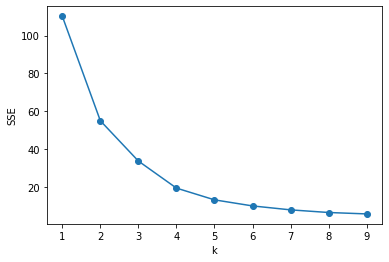

In [ ]:
SSE =[]
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(vectors)
    SSE.append(model.inertia_)
X = range(1,10)
plt.xlabel('k')  
plt.ylabel('SSE')  
plt.plot(X,SSE,'o-')  
plt.show()

In [ ]:

from gensim.models import Word2Vec
import nltk
from nltk.cluster import KMeansClusterer
import jieba
import numpy as np
  
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE

In [ ]:
df = pd.DataFrame(vectors)
df = df.values.reshape(-1,1)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# 轉化為二維數組
df = pd.DataFrame(vectors)
df = df.values.reshape(-1,1)

# k-means演算法
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# 引入上述將文章斷詞後轉為300維向量的資料
rawWordVec = vectors
# 將原本300維向量空間降為2維
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

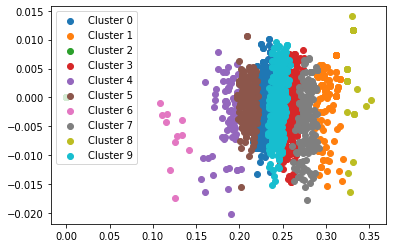

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data
X = np.array(vectors)

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Plot the data points, colored based on their cluster labels
for label in set(labels):
    cluster = X[labels == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster {label}")

plt.legend()
plt.show()


In [ ]:
# import numpy as np
# from sklearn.cluster import KMeans

# # Sample data
# X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

# # Number of clusters
# n_clusters = 2

# # Perform clustering using KMeans
# kmeans = KMeans(n_clusters=n_clusters)
# kmeans.fit(X)

# # Get the cluster labels for each data point
labels = kmeans.labels_

# Find the corresponding points for each cluster
for label in set(labels):
    cluster = X[labels == label]
    print(f"Points in Cluster {label}:")
    print(cluster)
    print()


Points in Cluster 0:
[[ 0.23629318  0.00292588 -0.12108026 ... -0.05942936 -0.30847233
   0.28394197]
 [ 0.22889404  0.00111236 -0.11644596 ... -0.05238332 -0.29807516
   0.27952439]
 [ 0.23750979  0.0010367  -0.11869082 ... -0.05474675 -0.29965978
   0.28635531]
 ...
 [ 0.23075051 -0.00442958 -0.11286866 ... -0.04094552 -0.29351387
   0.28072147]
 [ 0.2233573   0.00411177 -0.11539422 ... -0.04913438 -0.29119206
   0.2742207 ]
 [ 0.22927218 -0.00270029 -0.11160932 ... -0.04321895 -0.29391141
   0.2828867 ]]

Points in Cluster 1:
[[ 0.31146583  0.00019497 -0.16189259 ... -0.07427698 -0.40936145
   0.38218914]
 [ 0.29866728  0.00025117 -0.15248258 ... -0.06791048 -0.38950636
   0.36620902]
 [ 0.30889156 -0.00762057 -0.15191617 ... -0.05342929 -0.40249171
   0.39084695]
 ...
 [ 0.31339618  0.00182918 -0.16131372 ... -0.07157933 -0.41333002
   0.38669131]
 [ 0.31121598  0.00734764 -0.16263283 ... -0.07344047 -0.40253356
   0.374888  ]
 [ 0.31153188  0.00432885 -0.15655788 ... -0.07048684 -

In [ ]:
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-1.0475781e-03 -1.7737573e-03 -1.5855114e-03 -2.8793719e-03
 -1.5881680e-03 -3.0902154e-03 -9.5136602e-05  3.8136754e-03
  4.8868861e-03  4.6152938e-03  1.2769087e-03  1.6279436e-03
 -3.7100844e-03  2.0116911e-04  4.1241734e-03 -8.8016642e-04
  6.6111388e-04 -6.5465388e-04  3.7995633e-03 -2.1321010e-03
  1.1025289e-03  2.4666528e-03 -3.1900816e-03  1.6547425e-03
 -4.7310097e-03  8.8157256e-05  5.3628185e-04 -3.5450687e-03
 -1.9239599e-03  8.7037851e-04  2.8261500e-03 -4.0170071e-03
 -2.7020562e-03  2.1746864e-03 -4.7919946e-04 -1.6686638e-03
  2.6033921e-03  7.5697940e-04  1.8392431e-03  1.4499604e-03
  4.9480358e-03  4.3384167e-03  1.5260848e-03  1.8758700e-03
  4.7156694e-03  4.3331012e-03  3.1788095e-03 -4.7338284e-03
 -2.7806158e-03 -6.6614070e-04  2.8785127e-03  1.9463613e-03
 -3.6240746e-03  4.8823384e-04 -4.4818469e-0

<ipython-input-1-443782389acd>:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['sentence'])


In [ ]:
X = model[model.wv.vocab]

<ipython-input-2-c60322eee7e8>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

result = pca.fit_transform(X)

In [ ]:
['雙11','全家','LINE','回饋','Line','免費','限時','蝦皮','7-11','買一送一','新聞','咖啡','momo','line','折扣','免運','捐血','會員','台北','貼圖','點數','Point','星巴克','家樂福','購物金','PChome','露天','美亞','支付','買1送1','整理','限量','導購','point','柴油''OPENPOINT',
,'全聯','電影票','商城','APP','全聯禮券','騎乘金','折價券','肯德基','熊貓','衛生紙','Yahoo','MOMO','pchome','線上','優惠券','711'
'博客來','PCHOME','好友','滿額','台南','優惠碼','飲料','GoShare','無線','加碼','東森','紅包','電視','電子','foodomo','1212','好市多','points'
,'美式','簽到','禮物','LP','美國','汽油','羅技','跑鞋','橘子','全館','Momo','禮券','伊萊克斯','麥當勞','週末']


<ipython-input-17-bf433ad4456a>:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['雙'])
<ipython-input-17-bf433ad4456a>:25: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from c

Word2Vec(vocab=147, size=100, alpha=0.025)
['雙', '1', '全', '家', 'L', 'I', 'N', 'E', '回', '饋', 'i', 'n', 'e', '免', '費', '限', '時', '蝦', '皮', '7', '-', '買', '一', '送', '新', '聞', '咖', '啡', 'm', 'o', 'l', '折', '扣', '運', '捐', '血', '會', '員', '台', '北', '貼', '圖', '點', '數', 'P', 't', '星', '巴', '克', '樂', '福', '購', '物', '金', 'C', 'h', '露', '天', '美', '亞', '支', '付', '整', '理', '量', '導', 'p', '柴', '油', 'O', 'T', '聯', '電', '影', '票', '商', '城', 'A', '禮', '券', '騎', '乘', '價', '肯', '德', '基', '熊', '貓', '衛', '生', '紙', 'Y', 'a', 'M', 'c', '線', '上', '優', '惠', '博', '客', '來', 'H', '好', '友', '滿', '額', '南', '碼', '飲', '料', 'G', 'S', 'r', '無', '加', '東', '森', '紅', '包', '視', '子', 'f', 'd', '2', '市', '多', 's', '式', '簽', '到', '國', '汽', '羅', '技', '跑', '鞋', '橘', '館', '伊', '萊', '斯', '麥', '當', '勞', '週', '末']
[-1.61338958e-03  4.45682602e-03  2.97434744e-03 -3.88352457e-03
 -2.10125232e-03  3.45983147e-03 -1.57184768e-04 -4.89897607e-03
 -3.33011686e-03 -2.63447105e-03 -2.33891653e-03 -1.67039665e-03
 -2.28297338e-03  3.862846

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32879 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38651 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22478 missing from current font.
  font.set_

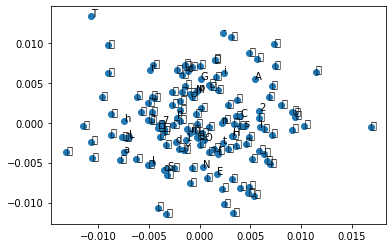

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences =['雙11','全家','LINE','回饋','Line','免費','限時','蝦皮','7-11','買一送一','新聞','咖啡','momo','line','折扣','免運','捐血','會員','台北','貼圖','點數','Point','星巴克','家樂福','購物金','PChome','露天','美亞','支付','買1送1','整理','限量','導購','point','柴油''OPENPOINT','全聯','電影票','商城','APP','全聯禮券','騎乘金','折價券','肯德基','熊貓','衛生紙','Yahoo','MOMO','pchome','線上','優惠券','711',
'博客來','PCHOME','好友','滿額','台南','優惠碼','飲料','GoShare','無線','加碼','東森','紅包','電視','電子','foodomo','1212','好市多','points'
,'美式','簽到','禮物','LP','美國','汽油','羅技','跑鞋','橘子','全館','Momo','禮券','伊萊克斯','麥當勞','週末']


# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['雙'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()